In [ ]:
# This is the last step of the project.
#First there will be some preprocessing and manual unit conversion.
#Second, 2 different unit conversion mapping will be deployed. Both will be used in experiments.
#Third, hot encoded data will be obtained from these 2 different type of methods.
#One hot encoding will be also used in experiments for comparison. In one hot encoding, ingredients usage amounts
#wont be a case. The model will only know ingredient names.
#Finally, all the classification and regression methods will be run one by one. 
#Any configuration can be tried on that part of the code.

In [136]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import log_loss
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from initial_functions import *
from sklearn.ensemble import HistGradientBoostingRegressor

In [2]:


ing=pd.read_csv("/Users/osman/Desktop/Master Project/data/2/recipe40k.csv")
nut=pd.read_csv("/Users/osman/Desktop/Master Project/data/1/nutrient.csv")
scores=pd.read_csv("/Users/osman/Desktop/Master Project/data/2/recipes-scores.csv")

In [3]:
#SOME PREPROCESSING ARE ONGOING:

#delete recipes that have more than one URL
ing = ing.groupby("recipe").filter(lambda x: len(x["URL"].unique()) == 1)

#the data was wrong in respect of black bean. It turned out that, almost all black peppers in can unit were actually black beans. 
#same story for green been.
ing.loc[(ing.ingredientName == 'black pepper') & (ing.ingredientUnit == 'can'), 'ingredientName'] = 'black bean'
ing.loc[(ing.ingredientName == 'green pepper') & (ing.ingredientUnit == 'can'), 'ingredientName'] = 'green bean'
ing.loc[(ing.ingredientName == 'onion') & (ing.ingredientUnit == 'bunch'), 'ingredientName'] = 'green onion'


In [4]:
#packcanjar_oz.csv will be uploaded to convert all these 3 units to ounce. 
#packcanjar_oz.csv was obtained by using pack_can_jar_to_oz.ipynb which scrapes all the ounce values of corresponding ingredients.
packcanjar_oz=pd.read_csv("/Users/osman/Desktop/Master Project/data/2/packcanjar_oz.csv")


#merge back and convert all of them to ounce unit
ing1=ing.merge(packcanjar_oz, on=['URL', 'ingredientName'], how='left')
ing1.loc[ing1.ingredientUnit == "can", 'ingredientQuantity_x'] = ing1.loc[ing1.ingredientUnit == "can", 'ingredientQuantity_y']
ing1.loc[ing1.ingredientUnit == "package", 'ingredientQuantity_x'] = ing1.loc[ing1.ingredientUnit == "package", 'ingredientQuantity_y']
ing1.loc[ing1.ingredientUnit == "jar", 'ingredientQuantity_x'] = ing1.loc[ing1.ingredientUnit == "jar", 'ingredientQuantity_y']
ing1.drop(columns=['ingredientQuantity_y'], inplace=True)
ing1.rename(columns={'ingredientQuantity_x': 'ingredientQuantity'}, inplace=True)
ing1.ingredientUnit.loc[(ing1.ingredientUnit == "can")|(ing1.ingredientUnit == "package")|(ing1.ingredientUnit == "jar")]="ounce"


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
#delete the recipes that have 0 ounce ingredients
delurl=ing1[(ing1.ingredientUnit=="ounce")&(ing1.ingredientQuantity==0)].URL.reset_index(drop=True)
ing=ing1[~ing1.URL.isin(delurl)]

In [6]:

#some ingredient exclusive conversions
#1 head cabbage = 32 ounce
ing.ingredientQuantity.loc[(ing.ingredientUnit=="head")&(ing.ingredientName=="cabbage")]=ing.ingredientQuantity*32
ing.ingredientUnit.loc[(ing.ingredientUnit=="head")&(ing.ingredientName=="cabbage")]="ounce"

#1 head broccoli = 9 ounce
ing.ingredientQuantity.loc[(ing.ingredientUnit=="head")&(ing.ingredientName=="broccoli")]=ing.ingredientQuantity*9
ing.ingredientUnit.loc[(ing.ingredientUnit=="head")&(ing.ingredientName=="broccoli")]="ounce"

#1 head cauliflower = 32 ounce
ing.ingredientQuantity.loc[(ing.ingredientUnit=="head")&(ing.ingredientName=="cauliflower")]=ing.ingredientQuantity*32
ing.ingredientUnit.loc[(ing.ingredientUnit=="head")&(ing.ingredientName=="cauliflower")]="ounce"

#1 head garlic = 2 ounce
ing.ingredientQuantity.loc[(ing.ingredientUnit=="head")&(ing.ingredientName=="garlic")]=ing.ingredientQuantity*2
ing.ingredientUnit.loc[(ing.ingredientUnit=="head")&(ing.ingredientName=="garlic")]="ounce"

#1 bunch green onion = 2 piece
ing.ingredientQuantity.loc[(ing.ingredientUnit=="bunch")&(ing.ingredientName=="green onion")]=ing.ingredientQuantity*2
ing.ingredientUnit.loc[(ing.ingredientUnit=="bunch")&(ing.ingredientName=="green onion")]="piece"

#1 bunch cilantro = 2.8 ounce
ing.ingredientQuantity.loc[(ing.ingredientUnit=="bunch")&(ing.ingredientName=="cilantro")]=ing.ingredientQuantity*2.8
ing.ingredientUnit.loc[(ing.ingredientUnit=="bunch")&(ing.ingredientName=="cilantro")]="ounce"

#1 bunch parsley = 2 ounce
ing.ingredientQuantity.loc[(ing.ingredientUnit=="bunch")&(ing.ingredientName=="parsley")]=ing.ingredientQuantity*2
ing.ingredientUnit.loc[(ing.ingredientUnit=="bunch")&(ing.ingredientName=="parsley")]="ounce"

#1 bunch asparagus = 18 ounce
ing.ingredientQuantity.loc[(ing.ingredientUnit=="bunch")&(ing.ingredientName=="asparagus")]=ing.ingredientQuantity*18
ing.ingredientUnit.loc[(ing.ingredientUnit=="bunch")&(ing.ingredientName=="asparagus")]="ounce"

#1 bunch kale = 7 ounce
ing.ingredientQuantity.loc[(ing.ingredientUnit=="bunch")&(ing.ingredientName=="kale")]=ing.ingredientQuantity*7
ing.ingredientUnit.loc[(ing.ingredientUnit=="bunch")&(ing.ingredientName=="kale")]="ounce"

#1 bunch spinach = 12 ounce
ing.ingredientQuantity.loc[(ing.ingredientUnit=="bunch")&(ing.ingredientName=="spinach")]=ing.ingredientQuantity*12
ing.ingredientUnit.loc[(ing.ingredientUnit=="bunch")&(ing.ingredientName=="spinach")]="ounce"

#1 loaf bread = 16 ounce
ing.ingredientQuantity.loc[(ing.ingredientUnit=="loaf")&(ing.ingredientName=="bread")]=ing.ingredientQuantity*16
ing.ingredientUnit.loc[(ing.ingredientUnit=="loaf")&(ing.ingredientName=="bread")]="ounce"

#1 loaf white bread = 16 ounce
ing.ingredientQuantity.loc[(ing.ingredientUnit=="loaf")&(ing.ingredientName=="white bread")]=ing.ingredientQuantity*16
ing.ingredientUnit.loc[(ing.ingredientUnit=="loaf")&(ing.ingredientName=="white bread")]="ounce"

#1 stick butter = 4 ounce
ing.ingredientQuantity.loc[(ing.ingredientUnit=="stick")&(ing.ingredientName=="butter")]=ing.ingredientQuantity*4
ing.ingredientUnit.loc[(ing.ingredientUnit=="stick")&(ing.ingredientName=="butter")]="ounce"

#1 stick unsalted butter = 4 ounce
ing.ingredientQuantity.loc[(ing.ingredientUnit=="stick")&(ing.ingredientName=="unsalted butter")]=ing.ingredientQuantity*4
ing.ingredientUnit.loc[(ing.ingredientUnit=="stick")&(ing.ingredientName=="unsalted butter")]="ounce"


<ipython-input-6-fb57417aa37d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ing.ingredientQuantity.loc[(ing.ingredientUnit=="head")&(ing.ingredientName=="cabbage")]=ing.ingredientQuantity*32
<ipython-input-6-fb57417aa37d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ing.ingredientUnit.loc[(ing.ingredientUnit=="head")&(ing.ingredientName=="cabbage")]="ounce"
<ipython-input-6-fb57417aa37d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [7]:
#NEW DICTIONARY
volume_units_to_cups = {
        'cup': 1.0,
        'teaspoon': 1/48,    # CUP
        'tablespoon': 1/16,  # CUP
        'pinch': 1/768,      # CUP  https://www.inchcalculator.com/
        'quart': 4.0,          # CUP
        'stalk': 1/2,       # CUP  https://www.howmuchisin.com/
        'pint': 2.0,           # CUP
        'bottle': 16,        # CUP
        'dash': 1/300,      # CUP
        'sprig': 1/80,      # CUP # https://www.howmuchisin.com/
        'gallon': 16.0,      # CUP
    }

volume_units_to_ounce = {
        'ounce': 1.0,
        'pound': 1/16,        #OUNCE
        'clove': 0.2,       #OUNCE https://www.howmuchisin.com/produce_converters
    }


# Apply the conversion for 'ingredientQuantity' and 'ingredientUnit' columns
#ing['quantity'] = ing['ingredientQuantity'] * ing['ingredientUnit'].str.lower().map(volume_units_to_cups)


# Your DataFrame ing and volume_units_to_cups dictionary

def convert_quantity_and_unit(row):
    unit = row['ingredientUnit']
    if unit in volume_units_to_cups:
        conversion_factor = volume_units_to_cups[unit]
        new_quantity = row['ingredientQuantity'] * conversion_factor
        new_unit = 'cup'
    elif unit in volume_units_to_ounce:
        conversion_factor = volume_units_to_ounce[unit]
        new_quantity = row['ingredientQuantity'] * conversion_factor
        new_unit = 'ounce'
    else:
        new_quantity = row['ingredientQuantity']
        new_unit = unit
    return new_quantity, new_unit
#ingf=ing
#ingf['newQuant'] = 0  
#ingf['newUnit'] = 0
#ingf[['newQuant', 'newUnit']] = ingf.apply(convert_quantity_and_unit, axis=1)
ing[['newQuant', 'newUnit']] = ing.apply(lambda row: pd.Series(convert_quantity_and_unit(row)), axis=1)





/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
#after doing feature engineering about units, the units that cant be converted will be deleted (1k recipe)
ing=trun(ing,"URL","ingredientUnit",215)

#one last truncation for recipes that have ingredients less than 50
ing=trun(ing,"URL","ingredientName",50)

In [9]:
#ingredient amounts must divided by serving size
ing.newQuant=ing.newQuant/ing.Servings

In [10]:
#merge with nutrients and score data
df1=ing.merge(scores, on='recipe', how='inner')
df=df1.merge(nut, on='recipe', how='inner')
df.recipe.nunique()

33523

In [11]:
#In one column, single unit values will be kept for experiments.
#in the conversion function, extreme estimations are used.
volume_units_to_single = {
        'cup': 1.0,
        'ounce': 1/8,
        'piece': 1/2,        #OUNCE
    }
df['singleQ'] = df['newQuant'] * df['newUnit'].str.lower().map(volume_units_to_single)

In [12]:
#create new ingredients according to old ingredients' unit types
def modify_ingredient_name(row):
    if row['newUnit'] == 'ounce':
        return row['ingredientName'] + '_oz'
    elif row['newUnit'] == 'cup':
        return row['ingredientName'] + '_cup'
    elif row['newUnit'] == 'piece':
        return row['ingredientName'] + '_piece'
    else:
        return row['ingredientName']

df['newName'] = df.apply(modify_ingredient_name, axis=1)

In [13]:
#some of the ingredients do not have some of the units
print(df.ingredientName.nunique(), df.newName.nunique())

423 1049


In [14]:

#HOT ENCODING
# Pivot the DataFrame to create a one-hot encoding with quantity values
hot_df = df.pivot_table(index="recipe", columns="newName", values="newQuant", aggfunc="sum", fill_value=0)

# Reset index and column names
hot_df.reset_index(inplace=True)
hot_df.columns.name = None

# Display the one-hot encoded DataFrame
hot_df


,recipe,acorn squash_cup,acorn squash_piece,agave nectar_cup,all purpose flour_cup,all purpose flour_oz,all purpose flour_piece,allspice_cup,almond biscotti_cup,almond extract_cup,...,yeast_piece,yellow squash_cup,yellow squash_oz,yellow squash_piece,yogurt_cup,yogurt_oz,yogurt_piece,zucchini_cup,zucchini_oz,zucchini_piece
0,1-2-3-lemon-icebox-pie,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,10-minute-chocolate-mug-cake,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,10-minute-mushroom-carbonara,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,10-minute-rice-cakes,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,10-minute-tomato-basil-salad,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33518,zucchini-with-pumpkin-blossom-cream-sauce-and-...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.5
33519,zucchini-yogurt-multigrain-muffins,0.0,0.0,0.0,0.062500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.041667,0.0,0.0
33520,zuries-fresh-fig-compote-over-cream-cheese,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
33521,zus-fried-apple-pies,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [15]:

#HOT ENCODING 2 according to the single value
# Pivot the DataFrame to create a one-hot encoding with quantity values
hot_df2 = df.pivot_table(index="recipe", columns="ingredientName", values="singleQ", aggfunc="sum", fill_value=0)

# Reset index and column names
hot_df2.reset_index(inplace=True)
hot_df2.columns.name = None

# Display the one-hot encoded DataFrame
hot_df2


,recipe,acorn squash,agave nectar,all purpose flour,allspice,almond,almond biscotti,almond extract,almond meal,amaretto liqueur,...,white sugar,white vinegar,whole wheat flour,wild rice,wonton wrappers,worcestershire sauce,yeast,yellow squash,yogurt,zucchini
0,1-2-3-lemon-icebox-pie,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,10-minute-chocolate-mug-cake,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.312500,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,10-minute-mushroom-carbonara,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,10-minute-rice-cakes,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,10-minute-tomato-basil-salad,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.03125,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33518,zucchini-with-pumpkin-blossom-cream-sauce-and-...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000
33519,zucchini-yogurt-multigrain-muffins,0.0,0.0,0.062500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.041667,0.00000,0.03125,0.0,0.0,0.0,0.0,0.0,0.041667,0.041667
33520,zuries-fresh-fig-compote-over-cream-cheese,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
33521,zus-fried-apple-pies,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.041667,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [16]:
#ONE HOT ENCODING
# Create a default one-hot encoding with 1s and 0s
one_hot_df = pd.get_dummies(df['ingredientName']).groupby(df['recipe']).max()

# Reset index and column names
one_hot_df.reset_index(inplace=True)
one_hot_df.columns.name = None

one_hot_df


,recipe,acorn squash,agave nectar,all purpose flour,allspice,almond,almond biscotti,almond extract,almond meal,amaretto liqueur,...,white sugar,white vinegar,whole wheat flour,wild rice,wonton wrappers,worcestershire sauce,yeast,yellow squash,yogurt,zucchini
0,1-2-3-lemon-icebox-pie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10-minute-chocolate-mug-cake,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,10-minute-mushroom-carbonara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10-minute-rice-cakes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10-minute-tomato-basil-salad,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33518,zucchini-with-pumpkin-blossom-cream-sauce-and-...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33519,zucchini-yogurt-multigrain-muffins,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
33520,zuries-fresh-fig-compote-over-cream-cheese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33521,zus-fried-apple-pies,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [306]:
#linear regression function

def linear_regression(x,y):
  from sklearn.linear_model import LinearRegression
    

  # Split your data into training and testing sets
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Create a Linear Regression model
  linear_reg = LinearRegression()

  # Fit the model to your training data
  linear_reg.fit(x_train, y_train)

  # Predict using the model on the test set
  y_pred_linear = linear_reg.predict(x_test)

  # Calculate R-squared on the test set
  r2_linear = r2_score(y_test, y_pred_linear)


  #Calculate MSE
  from sklearn.metrics import mean_squared_error
  mse_linear = mean_squared_error(y_test, y_pred_linear)

  #Calculate MAE
  from sklearn.metrics import mean_absolute_error
  mae_linear = mean_absolute_error(y_test, y_pred_linear)


  return ("R^2:", r2_linear, "MSE:", mse_linear, "MAE:", mae_linear)

def svr(x,y):
  
    from sklearn.svm import SVR
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score

    # Split your data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Create an SVR model
    svr = SVR()

    # Fit the model to your training data
    svr.fit(x_train, y_train)

    # Predict using the model on the test set
    y_pred_svr = svr.predict(x_test)

    # Calculate R-squared on the test set
    r2_svr = r2_score(y_test, y_pred_svr)
  


    #Calculate MSE
    from sklearn.metrics import mean_squared_error
    mse_svr = mean_squared_error(y_test, y_pred_svr)

    #Calculate MAE
    from sklearn.metrics import mean_absolute_error
    mae_svr = mean_absolute_error(y_test, y_pred_svr)

    return ("R^2:", r2_svr, "MSE:", mse_svr, "MAE:", mae_svr)


def neural(x,y):
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.optimizers import Adam
    from sklearn.model_selection import train_test_split

    # Split your data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Create a simple neural network model
    model = Sequential()
    model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Single output neuron for regression

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

    # Fit the model to your training data
    model.fit(x_train, y_train, epochs=10, batch_size=32)

    # Predict using the model
    y_pred_nn = model.predict(x_test)

    # Calculate R-squared
    r2_nn = r2_score(y_test, y_pred_nn)

    #Calculate MSE
    from sklearn.metrics import mean_squared_error
    mse_nn = mean_squared_error(y_test, y_pred_nn)

    #Calculate MAE
    from sklearn.metrics import mean_absolute_error
    mae_nn = mean_absolute_error(y_test, y_pred_nn)

    return ("R^2:", r2_nn, "MSE:", mse_nn, "MAE:", mae_nn)




def regressor(x,y,model):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Split your data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Create a simple neural network model
    model = model
    model.fit(x_train, y_train)

    # Predict using the model
    y_pred = model.predict(x_test)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)

    #Calculate MSE
    from sklearn.metrics import mean_squared_error
    mse= mean_squared_error(y_test, y_pred)

    #Calculate MAE
    from sklearn.metrics import mean_absolute_error
    mae= mean_absolute_error(y_test, y_pred)



    return ("R^2:", r2, "MSE:", mse, "MAE:", mae, "SMAPE:", smape_value)

def modelfitcsr(data,cl,mod):
    xtrain, xtest, ytrain, ytest = train_test_split(data, cl, test_size=0.2, random_state=17)
    model = mod
    model.fit(xtrain, ytrain)
    feature_importance=model.feature_importances_

    import matplotlib.pyplot as plt

    # Sort feature importances in descending order
    sorted_idx = feature_importance.argsort()[::-1]

    # Print and plot the top N most important features
    N = 10
    print("Top {} Features:".format(N))
    for i in range(N):
        print(f"{xtrain.columns[sorted_idx[i]]}: {feature_importance[sorted_idx[i]]:.4f}")

    # Create a bar chart to visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(range(N), feature_importance[sorted_idx[:N]], align="center")
    plt.xticks(range(N), xtrain.columns[sorted_idx[:N]], rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Feature Importance")
    plt.title("Top {} Feature Importances".format(N))
    plt.show()


    # Predict probabilities instead of class labels
    yprob = model.predict_proba(xtest)
    ypred = model.predict(xtest)

    results = pd.DataFrame()
    results['actual'] = ytest
    results['predicted'] = ypred

    # Logloss
    print("logloss:", log_loss(ytest, yprob))
    print("accuracy:", accuracy_score(ytest, ypred))

    return results, yprob


def analysis(resultlog):
    error0=0
    error1=0
    error2=0
    error3=0

    resultlog.reset_index(inplace=True)

    for i in range(len(resultlog)):
        if abs(resultlog.predicted[i] - resultlog.actual[i])==0:
            error0 +=1
        elif abs(resultlog.predicted[i] - resultlog.actual[i])==1:
            error1 +=1
        elif abs(resultlog.predicted[i] - resultlog.actual[i])==2:
            error2 +=1
        elif abs(resultlog.predicted[i] - resultlog.actual[i])==3:
            error3 +=1
    
    print("0 error proportion: ",error0/len(resultlog))
    print("1 error proportion: ",(error0+error1)/len(resultlog))
    print("2 error proportion: ",(error0+error1+error2)/len(resultlog))
    

    return error0+error1/len(resultlog)

    

In [18]:
# last preperations before applying ML models
k=df.drop(['ingredientName','ingredientQuantity','ingredientUnit','URL','newQuant','newUnit',"Servings","category"], axis=1)
k.drop_duplicates(subset=['recipe'], inplace=True)
fullonehot=one_hot_df.merge(k, on='recipe', how='inner') #no value info. only ingredients
fullhot=hot_df.merge(k, on='recipe', how='inner')   #3 units for whole ingredients
fullhot2=hot_df2.merge(k, on='recipe', how='inner')  #single unit for whole ingredients

In [22]:
#logistic regression
#usda one hot
#usda fullhot
#fsa one hot
#fsa fullhot
#0.2 test 0.8 training
#l2 penalty (l1 did not converge)
#Solver: lbfgs

logusda, chartusda=modelfitcsr(fullonehot.iloc[:, 1:-13],fullonehot.USDAscore,LogisticRegression(max_iter=1000))
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot.iloc[:, 1:-13],fullhot.USDAscore,LogisticRegression(max_iter=1000))
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot2.iloc[:, 1:-13],fullhot2.USDAscore,LogisticRegression(max_iter=1000))
analysis(logusda)

logusda, chartusda=modelfitcsr(fullonehot.iloc[:, 1:-13],fullonehot.FSAscore,LogisticRegression(max_iter=1000))
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot.iloc[:, 1:-13],fullhot.FSAscore,LogisticRegression(max_iter=1000))
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot2.iloc[:, 1:-13],fullhot2.FSAscore,LogisticRegression(max_iter=1000))
analysis(logusda)

logloss: 1.2599439777473043
accuracy: 0.45085756897837437
0 error proportion:  0.45085756897837437
1 error proportion:  0.8308724832214766
2 error proportion:  0.9528709917971663
logloss: 1.2251388194485673
accuracy: 0.4960477255779269
0 error proportion:  0.4960477255779269
1 error proportion:  0.8903803131991052
2 error proportion:  0.9847874720357942
logloss: 1.239575251998828
accuracy: 0.48769574944071586
0 error proportion:  0.48769574944071586
1 error proportion:  0.887248322147651
2 error proportion:  0.9846383296047726
logloss: 1.6888954576250752
accuracy: 0.31469052945563014
0 error proportion:  0.31469052945563014
1 error proportion:  0.6957494407158836
2 error proportion:  0.8865026099925429
logloss: 1.6784380244690154
accuracy: 0.3313944817300522
0 error proportion:  0.3313944817300522
1 error proportion:  0.7336316181953766
2 error proportion:  0.9257270693512304
logloss: 1.6949990757428044
accuracy: 0.3263236390753169
0 error proportion:  0.3263236390753169
1 error propor

2188.4022371364654

In [74]:
logusda, chartusda=modelfitcsr(fullhot2.iloc[:, 1:-13],fullhot2.USDAscore,HistGradientBoostingClassifier(learning_rate=0.2))
analysis(logusda)

logloss: 0.9633434350634313
accuracy: 0.5971662938105892
0 error proportion:  0.5971662938105892
1 error proportion:  0.9336316181953765
2 error proportion:  0.9934377330350485


4004.336465324385

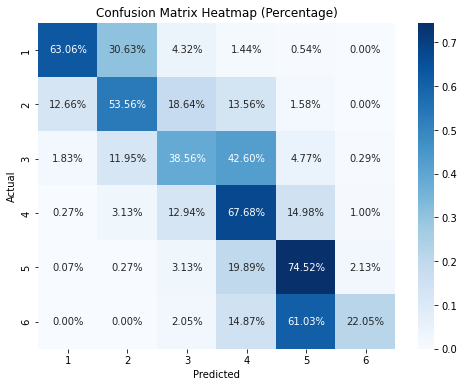

In [75]:
#USDA heatmap

import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'actual' and 'predicted' columns in your DataFrame
true_labels = logusda['actual']
predicted_labels = logusda['predicted']

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Normalize the confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues', xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Percentage)')
plt.show()


In [76]:
logusda, chartusda=modelfitcsr(fullhot2.iloc[:, 1:-13],fullhot2.FSAscore,HistGradientBoostingClassifier(learning_rate=0.2))
analysis(logusda)

logloss: 1.6514567580074573
accuracy: 0.4008948545861298
0 error proportion:  0.4008948545861298
1 error proportion:  0.7909023117076809
2 error proportion:  0.9343773303504848


2688.3900074571216

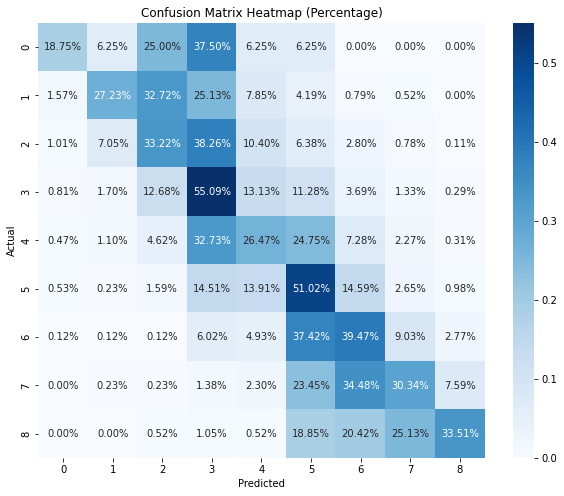

In [77]:
#FSA heatmap

import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'actual' and 'predicted' columns in your DataFrame
true_labels = logusda['actual']
predicted_labels = logusda['predicted']

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Normalize the confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues', xticklabels=range(0, 9), yticklabels=range(0, 9))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Percentage)')
plt.show()


In [47]:
logusda, chartusda=modelfitcsr(fullonehot.iloc[:, 1:-13],fullonehot.USDAscore,RandomForestClassifier())
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot.iloc[:, 1:-13],fullhot.USDAscore,RandomForestClassifier())
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot2.iloc[:, 1:-13],fullhot2.USDAscore,RandomForestClassifier())
analysis(logusda)

logusda, chartusda=modelfitcsr(fullonehot.iloc[:, 1:-13],fullonehot.FSAscore,RandomForestClassifier())
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot.iloc[:, 1:-13],fullhot.FSAscore,RandomForestClassifier())
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot2.iloc[:, 1:-13],fullhot2.FSAscore,RandomForestClassifier())
analysis(logusda)

logloss: 1.4660005682784645
accuracy: 0.45369127516778524
0 error proportion:  0.45369127516778524
1 error proportion:  0.8258016405667412
2 error proportion:  0.9476510067114094
logloss: 1.107142676539214
accuracy: 0.5671886651752424
0 error proportion:  0.5671886651752424
1 error proportion:  0.9148396718866517
2 error proportion:  0.9898583146905294
logloss: 1.0799560956203307
accuracy: 0.5747949291573453
0 error proportion:  0.5747949291573453
1 error proportion:  0.9166293810589112
2 error proportion:  0.9917971662938105
logloss: 2.184595896086033
accuracy: 0.3036539895600298
0 error proportion:  0.3036539895600298
1 error proportion:  0.6678598061148396
2 error proportion:  0.8726323639075317
logloss: 1.5661241632531548
accuracy: 0.4014914243102163
0 error proportion:  0.4014914243102163
1 error proportion:  0.7934377330350485
2 error proportion:  0.941834451901566
logloss: 1.5497133090697484
accuracy: 0.41431767337807607
0 error proportion:  0.41431767337807607
1 error proportio

2778.3837434750185

Top 10 Features:
butter: 0.0442
white sugar: 0.0437
egg: 0.0280
all purpose flour: 0.0243
salt: 0.0242
vanilla extract: 0.0212
brown sugar: 0.0198
milk: 0.0193
onion: 0.0179
olive oil: 0.0176


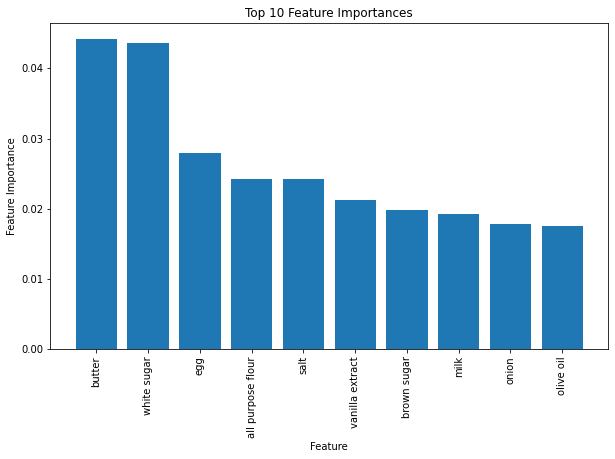

logloss: 1.0652199387733186
accuracy: 0.5730052199850858
0 error proportion:  0.5730052199850858
1 error proportion:  0.9191648023862788
2 error proportion:  0.9919463087248322


3842.346159582401

In [301]:
logusda, chartusda=modelfitcsr(fullhot2.iloc[:, 1:-13],fullhot2.USDAscore,RandomForestClassifier())
analysis(logusda)

In [73]:
# HistGradientBoostingClassifier

logusda, chartusda=modelfitcsr(fullonehot.iloc[:, 1:-13],fullonehot.USDAscore,HistGradientBoostingClassifier(learning_rate=0.2))
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot.iloc[:, 1:-13],fullhot.USDAscore,HistGradientBoostingClassifier(learning_rate=0.2))
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot2.iloc[:, 1:-13],fullhot2.USDAscore,HistGradientBoostingClassifier(learning_rate=0.2))
analysis(logusda)

logusda, chartusda=modelfitcsr(fullonehot.iloc[:, 1:-13],fullonehot.FSAscore,HistGradientBoostingClassifier(learning_rate=0.2))
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot.iloc[:, 1:-13],fullhot.FSAscore,HistGradientBoostingClassifier(learning_rate=0.2))
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot2.iloc[:, 1:-13],fullhot2.FSAscore,HistGradientBoostingClassifier(learning_rate=0.2))
analysis(logusda)

logloss: 1.2444573590206687
accuracy: 0.4559284116331096
0 error proportion:  0.4559284116331096
1 error proportion:  0.8325130499627144
2 error proportion:  0.9492915734526473
logloss: 0.9778131623778638
accuracy: 0.5891126025354213
0 error proportion:  0.5891126025354213
1 error proportion:  0.9316927665920954
2 error proportion:  0.9907531692766592
logloss: 0.9602343578517757
accuracy: 0.5997017151379568
0 error proportion:  0.5997017151379568
1 error proportion:  0.9322893363161819
2 error proportion:  0.9914988814317673
logloss: 1.7448476460469733
accuracy: 0.31901565995525727
0 error proportion:  0.31901565995525727
1 error proportion:  0.6842654735272184
2 error proportion:  0.8762117822520508
logloss: 1.6284446992533173
accuracy: 0.3883668903803132
0 error proportion:  0.3883668903803132
1 error proportion:  0.7794183445190157
2 error proportion:  0.9328859060402684
logloss: 1.6685454650955855
accuracy: 0.40178970917225953
0 error proportion:  0.40178970917225953
1 error propor

2694.3843400447427

In [124]:
#decision tree  



logusda, chartusda=modelfitcsr(fullonehot.iloc[:, 1:-13],fullonehot.USDAscore,DecisionTreeClassifier())
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot.iloc[:, 1:-13],fullhot.USDAscore,DecisionTreeClassifier())
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot2.iloc[:, 1:-13],fullhot2.USDAscore,DecisionTreeClassifier())
analysis(logusda)

logusda, chartusda=modelfitcsr(fullonehot.iloc[:, 1:-13],fullonehot.FSAscore,DecisionTreeClassifier())
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot.iloc[:, 1:-13],fullhot.FSAscore,DecisionTreeClassifier())
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot2.iloc[:, 1:-13],fullhot2.FSAscore,DecisionTreeClassifier())
analysis(logusda)

logloss: 22.507356219981144
accuracy: 0.364951528709918
0 error proportion:  0.364951528709918
1 error proportion:  0.7580909768829232
2 error proportion:  0.9203579418344519
logloss: 18.47606811310897
accuracy: 0.4873974645786726
0 error proportion:  0.4873974645786726
1 error proportion:  0.8629381058911261
2 error proportion:  0.9761372110365399
logloss: 18.212661846730633
accuracy: 0.4947054436987323
0 error proportion:  0.4947054436987323
1 error proportion:  0.8657718120805369
2 error proportion:  0.978523489932886
logloss: 26.58273546912951
accuracy: 0.2487695749440716
0 error proportion:  0.2487695749440716
1 error proportion:  0.5983594332587621
2 error proportion:  0.8173005219985086
logloss: 24.002387918672156
accuracy: 0.3339299030574198
0 error proportion:  0.3339299030574198
1 error proportion:  0.7041014168530947
2 error proportion:  0.8853094705443699
logloss: 23.808864947455415
accuracy: 0.33929903057419836
0 error proportion:  0.33929903057419836
1 error proportion:  

2275.3795674869502

In [131]:
#ada boost

logusda, chartusda=modelfitcsr(fullonehot.iloc[:, 1:-13],fullonehot.USDAscore,AdaBoostClassifier())
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot.iloc[:, 1:-13],fullhot.USDAscore,AdaBoostClassifier())
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot2.iloc[:, 1:-13],fullhot2.USDAscore,AdaBoostClassifier())
analysis(logusda)

logusda, chartusda=modelfitcsr(fullonehot.iloc[:, 1:-13],fullonehot.FSAscore,AdaBoostClassifier())
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot.iloc[:, 1:-13],fullhot.FSAscore,AdaBoostClassifier())
analysis(logusda)
logusda, chartusda=modelfitcsr(fullhot2.iloc[:, 1:-13],fullhot2.FSAscore,AdaBoostClassifier())
analysis(logusda)

logloss: 1.7341526476279818
accuracy: 0.38046234153616704
0 error proportion:  0.38046234153616704
1 error proportion:  0.8031319910514542
2 error proportion:  0.9409395973154362
logloss: 1.7233497394599115
accuracy: 0.41700223713646534
0 error proportion:  0.41700223713646534
1 error proportion:  0.851006711409396
2 error proportion:  0.9764354958985831
logloss: 1.7177444435193479
accuracy: 0.4298284862043251
0 error proportion:  0.4298284862043251
1 error proportion:  0.8684563758389262
2 error proportion:  0.9810589112602536
logloss: 2.156073885967023
accuracy: 0.22714392244593587
0 error proportion:  0.22714392244593587
1 error proportion:  0.5812080536912752
2 error proportion:  0.8263982102908277
logloss: 2.1175829332474705
accuracy: 0.2442953020134228
0 error proportion:  0.2442953020134228
1 error proportion:  0.605965697240865
2 error proportion:  0.8496644295302014
logloss: 2.1266379093177656
accuracy: 0.2405667412378822
0 error proportion:  0.2405667412378822
1 error proport

1613.359284116331

In [63]:
#GNN
logusda, chartusda=modelfitcsr(fullonehot.iloc[:, 1:-13],fullonehot.USDAscore,MLPClassifier())
analysis(logusda)
logusda, chartusda=modelfitcsr(scaled,fullhot.USDAscore,MLPClassifier())
analysis(logusda)
logusda, chartusda=modelfitcsr(scaled2,fullhot2.USDAscore,MLPClassifier())
analysis(logusda)

logloss: 3.566495644515636
accuracy: 0.5409167743859998
0 error proportion:  0.5409167743859998
1 error proportion:  0.3603460276424381
2 error proportion:  0.0844188127672268
3 error proportion:  0.013025753206721686


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


logloss: 3.920746539057635
accuracy: 0.5354479467037884
0 error proportion:  0.5354479467037884
1 error proportion:  0.36143979317888036
2 error proportion:  0.08720294322362533
3 error proportion:  0.014616684896092275


5385.361439793179

In [130]:
logusda, chartusda=modelfitcsr(scaled,fullhot.USDAscore,MLPClassifier(solver='lbfgs',learning_rate='adaptive'))
analysis(logusda)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


logloss: 1.1239654485178858
accuracy: 0.5306487695749441
0 error proportion:  0.5306487695749441
1 error proportion:  0.9205070842654736
2 error proportion:  0.9917971662938105


3558.3898583146906

In [ ]:
#neural network
#usda one hot
#usda fullhot
#fsa one hot
#fsa fullhot



a=neural(fullonehot.iloc[:, 1:-13],fullonehot.protein)
a1=neural(fullhot.iloc[:, 1:-13],fullhot.protein)
a2=neural(fullhot2.iloc[:, 1:-13],fullhot2.protein)


In [184]:
from sklearn.ensemble import RandomForestRegressor
a=regressor(fullonehot.iloc[:, 1:-13],fullonehot.USDAscore,RandomForestRegressor(n_estimators=100, random_state=42))
a1=regressor(fullhot.iloc[:, 1:-13],fullonehot.USDAscore,RandomForestRegressor(n_estimators=100, random_state=42))
a2=regressor(fullhot2.iloc[:, 1:-13],fullonehot.USDAscore,RandomForestRegressor(n_estimators=100, random_state=42))

In [209]:
fullhot2

,recipe,acorn squash,agave nectar,all purpose flour,allspice,almond,almond biscotti,almond extract,almond meal,amaretto liqueur,...,cholesterol,carbohydrates,protein,fat,saturatedFat,fiber,sodium,sugar_y,singleQ,newName
0,1-2-3-lemon-icebox-pie,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,67.9,47.7,5.9,12.8,4.6,0.5,235.0,38.5,0.187500,lemon_piece
1,10-minute-chocolate-mug-cake,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,...,189.7,94.9,13.1,48.2,8.6,4.4,247.6,65.4,0.003333,vanilla extract_cup
2,10-minute-mushroom-carbonara,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,98.9,57.8,16.7,7.9,2.5,2.8,143.5,2.9,0.010417,olive oil_cup
3,10-minute-rice-cakes,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,202.1,22.7,8.6,11.3,5.5,0.4,269.1,0.4,0.062500,basil_cup
4,10-minute-tomato-basil-salad,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,7.7,1.7,13.9,1.9,2.2,9.2,4.8,0.500000,tomato_piece
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33518,zucchini-with-pumpkin-blossom-cream-sauce-and-...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,35.6,12.5,3.3,25.2,9.0,3.4,142.8,6.4,0.031250,butter_cup
33519,zucchini-yogurt-multigrain-muffins,0.0,0.0,0.062500,0.0,0.0,0.0,0.0,0.0,0.0,...,23.9,33.1,3.5,7.6,1.2,1.7,185.9,20.9,0.020833,applesauce_cup
33520,zuries-fresh-fig-compote-over-cream-cheese,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,30.8,20.6,2.4,9.9,6.2,1.2,86.9,18.6,0.250000,fig_cup
33521,zus-fried-apple-pies,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.7,3.3,15.9,3.6,1.7,292.1,12.6,0.250000,all purpose flour_cup


In [196]:

a=regressor(fullonehot.iloc[:, 1:-13],fullonehot.USDAscore,HistGradientBoostingRegressor(learning_rate=0.2))
a1=regressor(fullhot.iloc[:, 1:-13],fullhot.USDAscore,HistGradientBoostingRegressor(learning_rate=0.2))
a2=regressor(fullhot2.iloc[:, 1:-13],fullhot2.USDAscore,HistGradientBoostingRegressor(learning_rate=0.2))

In [304]:
a2=regressor(fullhot2.iloc[:, 1:-13],fullhot2.FSAscore,HistGradientBoostingRegressor(learning_rate=0.2))

In [305]:
a2

('R^2:',
 0.6872391942602153,
 'MSE:',
 0.9284056942886708,
 'MAE:',
 0.7413117344029283,
 'SMAPE:',
 21.064081424681522)

In [259]:

a=regressor(fullonehot.iloc[:, 1:-13],fullonehot.FSAscore,LinearRegression())
a1=regressor(fullhot.iloc[:, 1:-13],fullhot.FSAscore,LinearRegression())
a2=regressor(fullhot2.iloc[:, 1:-13],fullhot2.FSAscore,LinearRegression())

In [260]:
a

('R^2:',
 0.3334805693374845,
 'MSE:',
 1.9785101695126115,
 'MAE:',
 1.1325878657626296)

In [261]:
a1

('R^2:',
 -18.66422627402094,
 'MSE:',
 58.37169911172036,
 'MAE:',
 1.1342377321970654)

In [262]:
a2

('R^2:',
 0.35080697881107425,
 'MSE:',
 1.927078094515844,
 'MAE:',
 1.0489806930996306)

In [188]:

a=neural(fullonehot.iloc[:, 1:-13],fullonehot.USDAscore)
a1=neural(fullhot.iloc[:, 1:-13],fullhot.USDAscore)
a2=neural(fullhot2.iloc[:, 1:-13],fullhot2.USDAscore)

Epoch 1/10
839/839 [==============================] - 2s 2ms/step - loss: 1.6449
Epoch 2/10
839/839 [==============================] - 2s 2ms/step - loss: 0.9243
Epoch 3/10
839/839 [==============================] - 1s 2ms/step - loss: 0.8637
Epoch 4/10
839/839 [==============================] - 2s 2ms/step - loss: 0.8132
Epoch 5/10
839/839 [==============================] - 1s 2ms/step - loss: 0.7643
Epoch 6/10
839/839 [==============================] - 2s 2ms/step - loss: 0.7220
Epoch 7/10
839/839 [==============================] - 1s 2ms/step - loss: 0.6884
Epoch 8/10
839/839 [==============================] - 1s 1ms/step - loss: 0.6511
Epoch 9/10
839/839 [==============================] - 1s 2ms/step - loss: 0.6184
Epoch 10/10
210/210 [==============================] - 0s 1ms/step
Epoch 1/10
839/839 [==============================] - 2s 2ms/step - loss: 1.7596
Epoch 2/10
839/839 [==============================] - 2s 2ms/step - loss: 0.6542
Epoch 3/10
839/839 [======================

In [189]:
a

('R^2:',
 0.3153589912895254,
 'MSE:',
 1.0839258077829137,
 'MAE:',
 0.8203870390307806)

In [190]:
a1

('R^2:',
 0.6473090600402327,
 'MSE:',
 0.5583814103009295,
 'MAE:',
 0.5763838740892148)

In [191]:
a2

('R^2:',
 0.669770553994547,
 'MSE:',
 0.5228203021162211,
 'MAE:',
 0.5561153726156393)

In [281]:

a=regressor(fullonehot.iloc[:, 1:-13],fullonehot.sugar_y,HistGradientBoostingRegressor(learning_rate=0.2))
a1=regressor(fullhot2.iloc[:, 1:-13],fullhot2.sugar_y,HistGradientBoostingRegressor(learning_rate=0.2))
a2=regressor(fullhot2.iloc[:, 1:-13],fullhot2.sugar_y,HistGradientBoostingRegressor(learning_rate=0.2))

In [272]:

a=regressor(fullonehot.iloc[:, 1:-13],fullonehot.sodium,LinearRegression())
a1=regressor(fullhot2.iloc[:, 1:-13],fullhot2.sodium,LinearRegression())
a2=regressor(fullhot2.iloc[:, 1:-13],fullhot2.sodium,LinearRegression())

In [277]:
a

('R^2:',
 0.5045672358955434,
 'MSE:',
 114.97938640480959,
 'MAE:',
 6.333094565558114)

In [278]:
a1

('R^2:',
 0.8312619940432221,
 'MSE:',
 39.16049521502953,
 'MAE:',
 3.1825214901968595)

In [279]:
a2

('R^2:',
 0.8362011902491245,
 'MSE:',
 38.01421303461263,
 'MAE:',
 3.1826783573764326)

In [292]:
df.ingredientName.value_counts().head(15)

salt                 14306
egg                  12096
butter               11965
white sugar          11085
all purpose flour    10230
onion                10221
garlic                9201
water                 6995
milk                  6901
vanilla extract       6445
olive oil             6321
brown sugar           4663
tomato                4655
black pepper          4526
vegetable oil         4333
Name: ingredientName, dtype: int64

In [282]:
features=['white sugar','butter','salt','all purpose flour','brown sugar','milk','vanilla extract','onion']

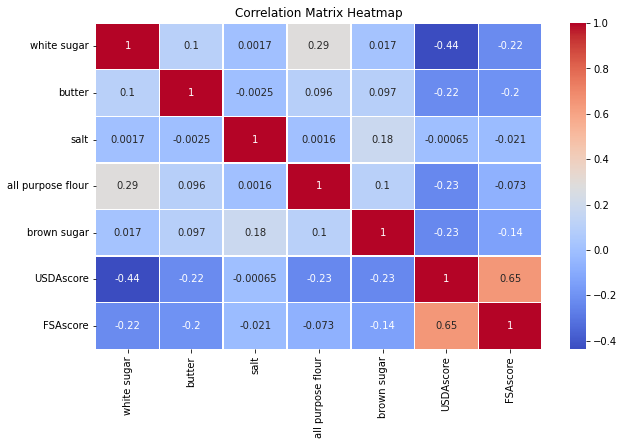

In [296]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of important features
features = ['white sugar', 'butter', 'salt', 'all purpose flour', 'brown sugar','USDAscore','FSAscore']
features2 = ['egg', 'olive oil', 'spinach', 'tomato', 'garlic','USDAscore','FSAscore']

# Create a new DataFrame with the selected features and target variables
data_subset = fullhot2[features]

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()
